In [3]:
import numpy as np
from discretize import TensorMesh
import matplotlib.pyplot as plt
from scipy.constants import mu_0
from pymatsolver import PardisoSolver

In [4]:
from pymatsolver import Solver

In [5]:
mesh = TensorMesh([10, 10, 10])

<Axes3DSubplot:xlabel='x1', ylabel='x2'>

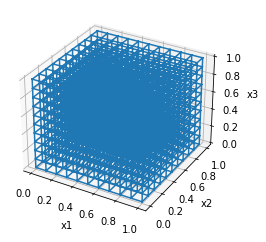

In [6]:
mesh.plot_grid()

In [7]:
C = mesh.edge_curl

In [8]:
Mfmui = mesh.get_face_inner_product(1./mu_0)

In [9]:
sigma = np.ones(mesh.n_cells) * 0.01

In [10]:
Mesigma = mesh.get_edge_inner_product(sigma)

In [11]:
# for i_time in range(n_time):
dt = 1e-7
A = C.T@Mfmui@C + Mesigma * 1./dt
rhs = np.random.random(mesh.n_edges)
Ainv = PardisoSolver(A)
sol = Ainv * rhs

C:\Users\sgkan\Projects\pymatsolver\pymatsolver\direct.py:23: PardisoTypeConversionWarning: Converting csc_matrix matrix to CSR format, will slow down.
  self.solver = MKLPardisoSolver(
C:\Users\sgkan\Projects\pymatsolver\pymatsolver\direct.py:73: PardisoTypeConversionWarning: Converting csc_matrix matrix to CSR format, will slow down.
  self.solver.refactor(self.A)


In [12]:
mesh.n_edges

3630

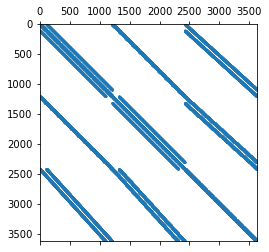

In [13]:
plt.spy(A, ms=1)

(<matplotlib.collections.QuadMesh at 0x22f0e061760>,)

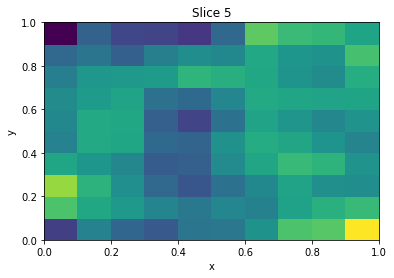

In [14]:
mesh.plot_slice(sol, v_type='Ez')

## TODO

- Bring a function to calcalute circular loop 
- Discretize 
- Solve BDF1 system
- Solve BDF2 system
- Calculcate analytic response using 1d code